In [6]:
from libemg import streamers, data_handler, filtering, gui, emg_predictor, feature_extractor, utils
import os
import json
import time
from os import walk

import numpy as np
from libemg.offline_metrics import OfflineMetrics

In [7]:
WINDOW_SIZE = 200 # 40
WINDOW_INC = 20
CLASSES = [0, 1, 2 , 3, 4]
REPS = [0, 1, 2, 3, 4 , 5]
STAGE = 4 # 0: collect data, 1: prepare model, 2: test band, 3: test model, 4: prepare imu model, 5: prepare imu imu ppg model


In [8]:
import os
from pathlib import Path

# Get current notebook directory
CURRENT_DIR = Path(os.path.abspath(''))

# Setup data paths - go up one level from streams to f1 folder
folder_location_0 = str(CURRENT_DIR.parent / "data" / f"S{0}")
folder_location_1 = str(CURRENT_DIR.parent / "data" / f"S{1}") 
folder_location_2 = str(CURRENT_DIR.parent / "data" / f"S{2}")
folder_location_3 = str(CURRENT_DIR.parent / "data" / f"S{3}")
folder_location_4 = str(CURRENT_DIR.parent / "data" / f"S{4}")

# Print path to verify
print(f"Loading data from: {folder_location_0}")
emg_regex_filters = [
        data_handler.RegexFilter(left_bound = "C_", right_bound="_R_", values = [str(i) for i in REPS], description='reps'),
        data_handler.RegexFilter(left_bound = "_R_", right_bound="_emg.csv", values = [str(i) for i in CLASSES], description='classes')

    ]
imu_regex_filters = [
        data_handler.RegexFilter(left_bound = "C_", right_bound="_R_", values = [str(i) for i in REPS], description='reps'),
        data_handler.RegexFilter(left_bound = "_R_", right_bound="_imu.csv", values = [str(i) for i in CLASSES], description='classes')
    ]
ppg_regex_filters = [
        data_handler.RegexFilter(left_bound = "C_", right_bound="_R_", values = [str(i) for i in REPS], description='reps'),
        data_handler.RegexFilter(left_bound = "_R_", right_bound="_ppg.csv", values = [str(i) for i in CLASSES], description='classes')
    ]


Loading data from: c:\Users\gueid\Documents\Club IA\F1-team-1\f1\data\S0


In [9]:
odh = data_handler.OfflineDataHandler()
odh.get_data(folder_location=folder_location_0, regex_filters=ppg_regex_filters)
windows_0, metadata_0 = odh.parse_windows(WINDOW_SIZE,WINDOW_INC)
#print("windows_0", windows_0)
print("windows_0 shape", windows_0.shape)
# print("metadata_0 classes", metadata_0['classes'])
# print("metadata_0 reps", metadata_0['reps'])
print("metadata_0 classes shape", metadata_0['classes'].shape)

    

fi_ppg = filtering.Filter(100)  # Fréquence d'échantillonnage PPG
fi_ppg.install_filters({ "name": "bandpass", "cutoff": [0.66, 3] , "order": 4})
fi_ppg.install_filters({ "name": "pca", "num_components": 2})
fi_ppg.install_filters({"name": "standardization"})



# 2. Filter the RAW DATA
filtered_windows_0 = fi_ppg.filter(windows_0)
#print("filtered_windows_0", filtered_windows_0)
print("filtered_windows_0 shape", filtered_windows_0.shape)

fe = feature_extractor.FeatureExtractor()
feature_dic_0 = {
    'training_features': fe.extract_features(["MPK", "WENG", "MEAN"], filtered_windows_0),  # <-- Use filtered_windows
    'training_labels': metadata_0['classes']
}

print("feature_dic_0", feature_dic_0)
print("feature_dic_0 MPK", feature_dic_0['training_features']['MPK'].shape)
print("feature_dic_0 WENG", feature_dic_0['training_features']['WENG'].shape)
print("feature_dic_0 MEAN", feature_dic_0['training_features']['MEAN'].shape)

    

25 data files fetched out of 150 files.
windows_0 shape (73, 4, 200)
metadata_0 classes shape (73,)
filtered_windows_0 shape (73, 4, 200)
feature_dic_0 {'training_features': {'MPK': array([[ -48.85849741, -130.51989728,  225.72696621,   -7.72948417],
       [-121.72934398, -177.59834181,  141.49248473,  -70.02278984],
       [-188.43186165, -219.66517443,   63.12935881, -129.11089942],
       [-246.4181753 , -254.51836388,   -5.16129601, -183.23928095],
       [-293.37799363, -280.15168501,  -55.23355138, -230.78884691],
       [-325.8385902 , -294.33207076,  -95.83042829, -270.32046482],
       [-342.41157018, -293.49833877, -127.27904257, -300.61409863],
       [-343.66387041, -279.2161653 , -149.04872742, -320.7013583 ],
       [-328.76521831, -250.55874081, -160.85173496, -328.16790413],
       [-297.30527614, -207.48843944, -162.64513919, -322.073053  ],
       [-249.30118138, -146.59864295, -151.36945419, -304.40339374],
       [-183.2421603 ,  -70.28710945, -126.24718943, -275.3

In [10]:
odh = data_handler.OfflineDataHandler()
odh.get_data(folder_location=folder_location_1, regex_filters=ppg_regex_filters)
windows_1, metadata_1 = odh.parse_windows(WINDOW_SIZE,WINDOW_INC)
#print("windows_1", windows_1)
print("windows_1 shape", windows_1.shape)
# print("metadata_1 classes", metadata_1['classes'])
# print("metadata_1 reps", metadata_1['reps'])
print("metadata_1 classes shape", metadata_1['classes'].shape)
fi_ppg = filtering.Filter(100)  # Fréquence d'échantillonnage PPG
fi_ppg.install_filters({ "name": "bandpass", "cutoff": [0.66, 3] , "order": 4})
fi_ppg.install_filters({ "name": "pca", "num_components": 2})
fi_ppg.install_filters({"name": "standardization"})
# 2. Filter the RAW DATA
filtered_windows_1 = fi_ppg.filter(windows_1)
#print("filtered_windows_1", filtered_windows_1)
print("filtered_windows_1 shape", filtered_windows_1.shape)
fe = feature_extractor.FeatureExtractor()
feature_dic_1 = {
    'training_features': fe.extract_features(["MPK", "WENG", "MEAN"], filtered_windows_1),  # <-- Use filtered_windows
    'training_labels': metadata_1['classes']
}
print("feature_dic_1", feature_dic_1)
print("feature_dic_1 MPK", feature_dic_1['training_features']['MPK'].shape)
print("feature_dic_1 WENG", feature_dic_1['training_features']['WENG'].shape)
print("feature_dic_1 MEAN", feature_dic_1['training_features']['MEAN'].shape)


25 data files fetched out of 150 files.
windows_1 shape (70, 4, 200)
metadata_1 classes shape (70,)
filtered_windows_1 shape (70, 4, 200)
feature_dic_1 {'training_features': {'MPK': array([[ 88.74130295,  99.20898413,   4.39106788, -18.3952236 ],
       [101.53421348,  71.0662359 ,  10.33954583, -39.2688313 ],
       [155.10432286,  95.89537861,  25.74043886, -45.2672863 ],
       [207.20216085, 120.46640373,  40.49024422, -51.35845502],
       [256.61959289, 144.08762063,  54.54709956, -57.40446937],
       [302.30845642, 166.11123756,  67.44470359, -63.26162257],
       [343.13275314, 185.95700812,  78.95912166, -68.78621175],
       [378.2351864 , 203.13177514,  88.92349221, -73.84056028],
       [406.93820517, 217.24424828,  97.21145834, -78.29892247],
       [428.7601837 , 228.01465424, 103.73867006, -82.05293892],
       [443.42368634, 235.2791614 , 108.46282415, -85.01631406],
       [450.85583208, 238.98918795, 111.38235632, -87.12843418],
       [451.18107537, 239.20587816, 11

In [11]:
odh = data_handler.OfflineDataHandler()
odh.get_data(folder_location=folder_location_2, regex_filters=ppg_regex_filters)
windows_2, metadata_2 = odh.parse_windows(WINDOW_SIZE,WINDOW_INC)
#print("windows_2", windows_2)
print("windows_2 shape", windows_2.shape)
# print("metadata_2 classes", metadata_2['classes'])
# print("metadata_2 reps", metadata_2['reps'])
print("metadata_2 classes shape", metadata_2['classes'].shape)
fi_ppg = filtering.Filter(100)  # Fréquence d'échantillonnage PPG
fi_ppg.install_filters({ "name": "bandpass", "cutoff": [0.66, 3] , "order": 4})
fi_ppg.install_filters({ "name": "pca", "num_components": 2})
fi_ppg.install_filters({"name": "standardization"})
# 2. Filter the RAW DATA
filtered_windows_2 = fi_ppg.filter(windows_2)
#print("filtered_windows_2", filtered_windows_2)
print("filtered_windows_2 shape", filtered_windows_2.shape)
fe = feature_extractor.FeatureExtractor()
feature_dic_2 = {
    'training_features': fe.extract_features(["MPK", "WENG", "MEAN"], filtered_windows_2),  # <-- Use filtered_windows
    'training_labels': metadata_2['classes']
}
print("feature_dic_2", feature_dic_2)
print("feature_dic_2 MPK", feature_dic_2['training_features']['MPK'].shape)
print("feature_dic_2 WENG", feature_dic_2['training_features']['WENG'].shape)
print("feature_dic_2 MEAN", feature_dic_2['training_features']['MEAN'].shape)


25 data files fetched out of 150 files.
windows_2 shape (74, 4, 200)
metadata_2 classes shape (74,)
filtered_windows_2 shape (74, 4, 200)
feature_dic_2 {'training_features': {'MPK': array([[-1.35059829e+02, -3.24911424e+01, -6.22531273e+01,
        -7.83147530e+01],
       [-1.95403206e+02, -1.61439511e+01, -1.44390208e+02,
        -1.63696861e+02],
       [-2.52268962e+02,  1.32480540e+00, -2.19360656e+02,
        -2.44927162e+02],
       [-2.99012897e+02,  2.17841888e+01, -2.89191335e+02,
        -3.20421373e+02],
       [-3.24364236e+02,  4.85813275e+01, -3.50457875e+02,
        -3.86138571e+02],
       [-3.31902226e+02,  7.89018944e+01, -3.99934059e+02,
        -4.37010316e+02],
       [-3.20102371e+02,  1.13537477e+02, -4.38866401e+02,
        -4.75178264e+02],
       [-2.88221127e+02,  1.53132277e+02, -4.65196607e+02,
        -4.94367824e+02],
       [-2.34306582e+02,  1.98152776e+02, -4.78535959e+02,
        -4.96927591e+02],
       [-1.56167972e+02,  2.48863215e+02, -4.78023884

In [12]:
odh = data_handler.OfflineDataHandler()
odh.get_data(folder_location=folder_location_3, regex_filters=ppg_regex_filters)
windows_3, metadata_3 = odh.parse_windows(WINDOW_SIZE,WINDOW_INC)
#print("windows_3", windows_3)
print("windows_3 shape", windows_3.shape)
# print("metadata_3 classes", metadata_3['classes'])
# print("metadata_3 reps", metadata_3['reps'])
print("metadata_3 classes shape", metadata_3['classes'].shape)
fi_ppg = filtering.Filter(100)  # Fréquence d'échantillonnage PPG
fi_ppg.install_filters({ "name": "bandpass", "cutoff": [0.66, 3] , "order": 4})
fi_ppg.install_filters({ "name": "pca", "num_components": 2})
fi_ppg.install_filters({"name": "standardization"})
# 2. Filter the RAW DATA
filtered_windows_3 = fi_ppg.filter(windows_3)
#print("filtered_windows_3", filtered_windows_3)
print("filtered_windows_3 shape", filtered_windows_3.shape)
fe = feature_extractor.FeatureExtractor()
feature_dic_3 = {
    'training_features': fe.extract_features(["MPK", "WENG", "MEAN"], filtered_windows_3),  # <-- Use filtered_windows
    'training_labels': metadata_3['classes']
}
print("feature_dic_3", feature_dic_3)
print("feature_dic_3 MPK", feature_dic_3['training_features']['MPK'].shape)
print("feature_dic_3 WENG", feature_dic_3['training_features']['WENG'].shape)
print("feature_dic_3 MEAN", feature_dic_3['training_features']['MEAN'].shape)


25 data files fetched out of 150 files.
windows_3 shape (73, 4, 200)
metadata_3 classes shape (73,)
filtered_windows_3 shape (73, 4, 200)
feature_dic_3 {'training_features': {'MPK': array([[  59.6906765 ,   64.09359238,    3.89609795,   18.4809291 ],
       [  54.40613242,   64.220514  ,    8.44328374,   23.18176721],
       [  50.77581114,   66.23172037,   13.72358352,   29.69135686],
       [  49.22126913,   70.67559784,   20.38279038,   39.33537782],
       [  50.41998922,   78.39064338,   27.63879666,   50.26961163],
       [  54.58001735,   89.49112437,   34.86616682,   62.04839709],
       [  62.11542886,  104.06770281,   41.98673125,   74.66854618],
       [  72.7124214 ,  122.40687168,   48.93493411,   88.12118234],
       [  86.24154523,  144.319335  ,   55.63900579,  102.35937267],
       [ 102.5814686 ,  169.54175519,   62.02198035,  117.28736897],
       [ 121.62970973,  197.74870839,   68.00307489,  132.76103347],
       [ 142.91146225,  228.47889838,   73.49940413,  148.5

In [13]:
odh = data_handler.OfflineDataHandler()
odh.get_data(folder_location=folder_location_4, regex_filters=ppg_regex_filters)
windows_4, metadata_4 = odh.parse_windows(WINDOW_SIZE,WINDOW_INC)
#print("windows_4", windows_4)
print("windows_4 shape", windows_4.shape)
# print("metadata_4 classes", metadata_4['classes'])
# print("metadata_4 reps", metadata_4['reps'])
print("metadata_4 classes shape", metadata_4['classes'].shape)
fi_ppg = filtering.Filter(100)  # Fréquence d'échantillonnage PPG
fi_ppg.install_filters({ "name": "bandpass", "cutoff": [0.66, 3] , "order": 4})
fi_ppg.install_filters({ "name": "pca", "num_components": 2})
fi_ppg.install_filters({"name": "standardization"})
# 2. Filter the RAW DATA
filtered_windows_4 = fi_ppg.filter(windows_4)
#print("filtered_windows_4", filtered_windows_4)
print("filtered_windows_4 shape", filtered_windows_4.shape)
fe = feature_extractor.FeatureExtractor()
feature_dic_4 = {
    'training_features': fe.extract_features(["MPK", "WENG", "MEAN"], filtered_windows_4),  # <-- Use filtered_windows
    'training_labels': metadata_4['classes']
}
print("feature_dic_4", feature_dic_4)
print("feature_dic_4 MPK", feature_dic_4['training_features']['MPK'].shape)
print("feature_dic_4 WENG", feature_dic_4['training_features']['WENG'].shape)
print("feature_dic_4 MEAN", feature_dic_4['training_features']['MEAN'].shape)


25 data files fetched out of 150 files.
windows_4 shape (71, 4, 200)
metadata_4 classes shape (71,)
filtered_windows_4 shape (71, 4, 200)
feature_dic_4 {'training_features': {'MPK': array([[-223.33305304, -252.73572687,   41.83967556,   74.35372818],
       [ 307.45479023,  263.82298908,  224.52936833,  226.80715813],
       [ 829.9907428 ,  773.2789488 ,  404.2766013 ,  377.49221448],
       [1333.41209211, 1264.0485021 ,  578.42695503,  524.35211355],
       [1812.8685234 , 1727.55758843,  744.457776  ,  665.40553121],
       [2255.768279  , 2156.04775308,  902.05785386,  798.80544369],
       [2655.09927946, 2542.79344869, 1048.34473003,  922.89023899],
       [3005.10518503, 2882.27705054, 1180.11021105, 1036.22476802],
       [3301.41861422, 3170.31540306, 1296.06785779, 1137.62983847],
       [3541.14033178, 3404.13428727, 1395.33717162, 1226.19953284],
       [3722.8632687 , 3582.3897897 , 1477.44749695, 1301.30654544],
       [3846.64280072, 3705.13802757, 1542.32560111, 1362.5

In [14]:
filtered_windows = np.concatenate(( filtered_windows_0,filtered_windows_1,filtered_windows_2,filtered_windows_3))
print("filtered_windows shape", filtered_windows.shape)
print("filtered_windows", filtered_windows)

filtered_windows shape (290, 4, 200)
filtered_windows [[[-129.22894152 -128.93440076 -128.02719006 ...  -51.60127063
    -51.11478055  -48.85849741]
  [-217.74768987 -217.75876351 -216.84848382 ... -133.0848158
   -132.52770786 -130.51989728]
  [ 163.76534671  164.69997138  163.75549311 ...  189.94382992
    191.60535381  193.37100262]
  [ -71.02038954  -69.95507313  -68.86795128 ...   -9.71283377
     -8.61216122   -7.72948417]]

 [[-212.00677133 -212.60245285 -212.70526545 ... -124.25028349
   -123.94879915 -121.72934398]
  [-265.91808572 -266.90879992 -267.11055099 ... -179.82442611
   -179.53986119 -177.59834181]
  [  70.96082836   71.54550115   71.00243913 ...  117.15752518
    118.66425496  120.28062656]
  [-148.41725495 -147.5928112  -146.74026392 ...  -71.92687571
    -70.78396525  -70.02278984]]

 [[-289.06727717 -290.5304591  -291.61753577 ... -190.75872913
   -190.62993709 -188.43186165]
  [-309.68929511 -311.63789151 -312.92488229 ... -221.57735469
   -221.5525432  -219.665

In [15]:
["MPK", "WENG", "MEAN"]
feature_dic = {
        'training_features': {},
        'training_labels': None
    }
feature_dic['training_features']["MPK"] = np.concatenate((
    feature_dic_0['training_features']['MPK'],
    feature_dic_1['training_features']['MPK'],
    feature_dic_2['training_features']['MPK'],
    feature_dic_3['training_features']['MPK'],
    #feature_dic_4['training_features']['MPK']
))
print("MPK features : ", feature_dic['training_features']["MPK"])

feature_dic['training_features']["WENG"] = np.concatenate((
    feature_dic_0['training_features']['WENG'],
    feature_dic_1['training_features']['WENG'],
    feature_dic_2['training_features']['WENG'],
    feature_dic_3['training_features']['WENG'],
    #feature_dic_4['training_features']['WENG']
))
print("WENG features : ", feature_dic['training_features']["WENG"])
feature_dic['training_features']["MEAN"] = np.concatenate((
    feature_dic_0['training_features']['MEAN'],
    feature_dic_1['training_features']['MEAN'],
    feature_dic_2['training_features']['MEAN'],
    feature_dic_3['training_features']['MEAN'],
    #feature_dic_4['training_features']['MEAN']
))
print("MEAN features : ", feature_dic['training_features']["MEAN"])
feature_dic['training_labels'] = np.concatenate((
    feature_dic_0['training_labels'],
    feature_dic_1['training_labels'],
    feature_dic_2['training_labels'],
    feature_dic_3['training_labels'],
    #feature_dic_4['training_labels']
))
print("feature_dic['training_labels'] : ", feature_dic['training_labels'])

MPK features :  [[ -48.85849741 -130.51989728  225.72696621   -7.72948417]
 [-121.72934398 -177.59834181  141.49248473  -70.02278984]
 [-188.43186165 -219.66517443   63.12935881 -129.11089942]
 ...
 [  54.89671867   57.74344624   -5.8497285    27.35294088]
 [  55.24727523   59.81634511   -7.58259739   25.15426857]
 [  54.11660834   59.9068861    -9.03087556   22.38396804]]
WENG features :  [[16.69647975 17.95576439 17.99401956 ...  6.48559935  7.42234447
   5.63171589]
 [17.89025458 18.43700344 16.8136491  ...  6.18674272  7.09924949
   6.02582275]
 [18.59509582 18.79172519 14.8369071  ...  6.02118395  6.84227783
   6.46663225]
 ...
 [15.57260465 15.66626242 11.633748   ...  1.20654658  0.05644454
   1.68853242]
 [15.59906326 15.75794833 11.96595194 ...  0.79181132 -0.38623809
   1.29082395]
 [15.56988433 15.77858586 12.20693264 ...  0.31212504 -0.90897817
   0.82250287]]
MEAN features :  [[ -84.81472255 -167.2344389   183.48549521  -35.11656302]
 [-161.42665928 -214.36501898  102.9468

In [16]:
print("Distribution des classes :", np.unique(feature_dic['training_labels'], return_counts=True))

Distribution des classes : (array([0, 1, 2, 3, 4], dtype=int64), array([59, 58, 56, 58, 59], dtype=int64))


In [17]:
model = emg_predictor.EMGClassifier("LDA")
model.fit(feature_dictionary=feature_dic)
model.add_velocity(filtered_windows, feature_dic['training_labels'])
model.add_majority_vote(5)

In [18]:
predictions , probabilities = model.run(test_data=feature_dic_4['training_features'])
print("predictions", predictions)
print("probabilities", probabilities)
np.unique(predictions, return_counts=True)

predictions [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
probabilities [0.99426719 0.93431339 0.77930835 0.97605467 0.80556063 0.93009818
 0.98544442 0.9931825  0.99559768 0.99683955 0.99770589 0.99838665
 0.99892164 0.99932167 0.99960258 0.99978676 0.99989915 0.99995361
 0.99997608 0.99998408 0.99998408 0.9999766  0.99996141 0.99992281
 0.99980578 0.99935216 0.99623892 0.93459098 0.91335272 0.99950294
 0.99937952 0.76849901 0.95902667 0.99643834 0.99879858 0.99854819
 0.99503304 0.97049505 0.79887792 0.60513832 0.79723834 0.99286759
 0.99903809 0.99863472 0.95235393 0.68356641 0.71309316 0.88909462
 0.93939258 0.94850856 0.94238421 0.94332502 0.97045933 0.99443453
 0.9996122  0.99999396 0.99999974 0.99999991 0.99999998 0.99999999
 0.99999999 0.99999997 0.99999989 0.99999963 0.99999869 0.99999581
 0.9999856  0.99994105 0.99966247 0.9983965  0.9991197 ]


(array([2, 3]), array([44, 27], dtype=int64))

In [19]:
OfflineMetrics = OfflineMetrics()
OfflineMetrics.extract_common_metrics(y_true=feature_dic_4['training_labels'], y_predictions=predictions)

AER not computed... Please input the null_label parameter.


{'CA': 0.19718309859154928, 'INS': 0.0}

In [20]:
OfflineMetrics.get_CONF_MAT(y_true=feature_dic_4['training_labels'], y_predictions=predictions)

array([[ 0.,  0., 11.,  4.,  0.],
       [ 0.,  0.,  8.,  5.,  0.],
       [ 0.,  0.,  8.,  6.,  0.],
       [ 0.,  0.,  8.,  6.,  0.],
       [ 0.,  0.,  9.,  6.,  0.]])

In [21]:
OfflineMetrics.get_RECALL(y_true=feature_dic_4['training_labels'], y_predictions=predictions)

0.19718309859154926

In [22]:
OfflineMetrics.get_PREC(y_true=feature_dic_4['training_labels'], y_predictions=predictions)

ZeroDivisionError: division by zero

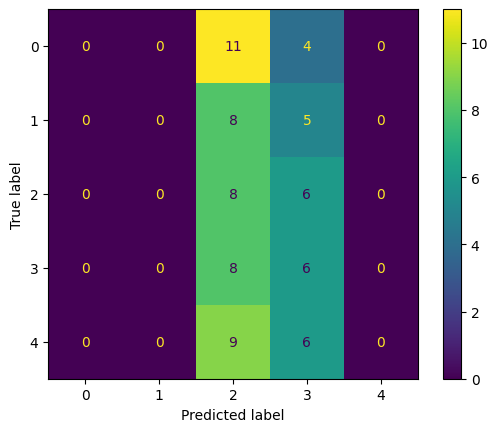

In [23]:
OfflineMetrics.visualize_conf_matrix(OfflineMetrics.get_CONF_MAT(y_true=feature_dic_4['training_labels'], y_predictions=predictions))